<a href="https://colab.research.google.com/github/Div-ya18/LGMVIP-Data-Science/blob/main/Image%20to%20Pencil%20Sketch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing Packages
import cv2
import numpy as np
import plotly.express as px


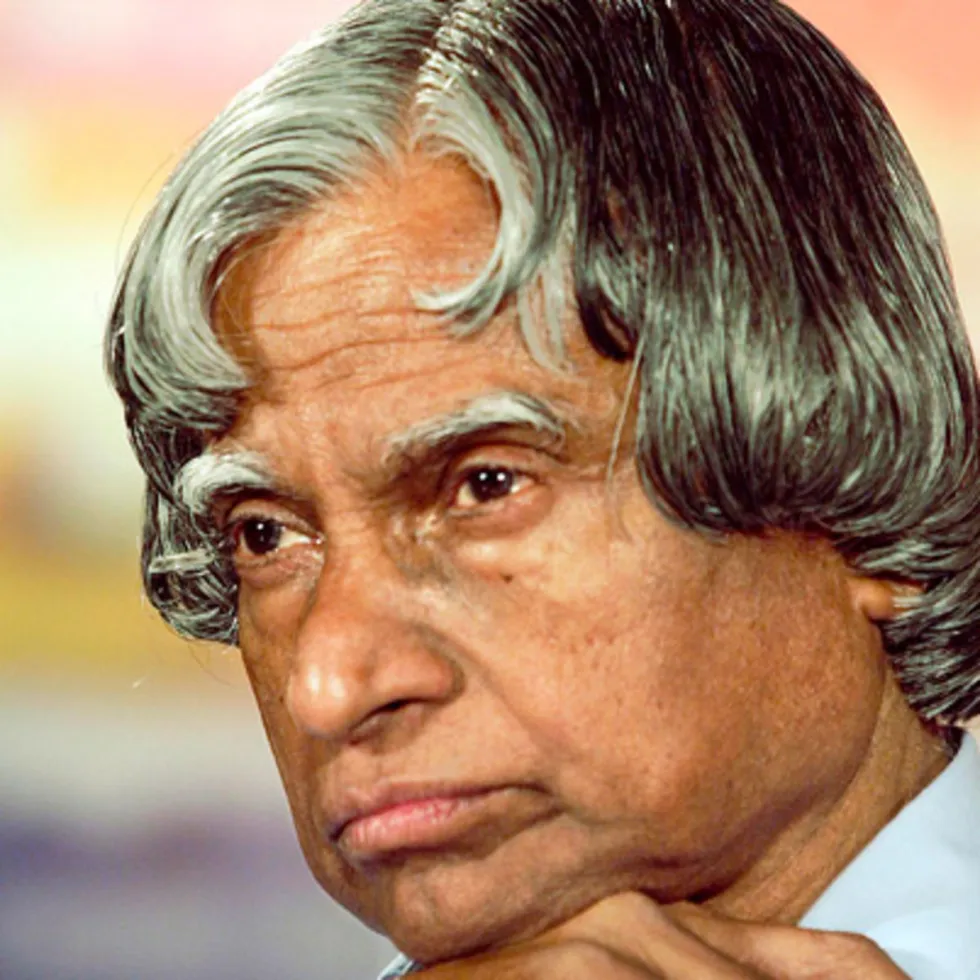

In [4]:
#Loading Images
img = cv2.imread(r"/content/APJ.jpg")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imgs=px.imshow(img)
#imgs.update_layout(width=990, height=600 ,margin=dict(l=20, r=20, b=10, t=10))
imgs.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
imgs.show()


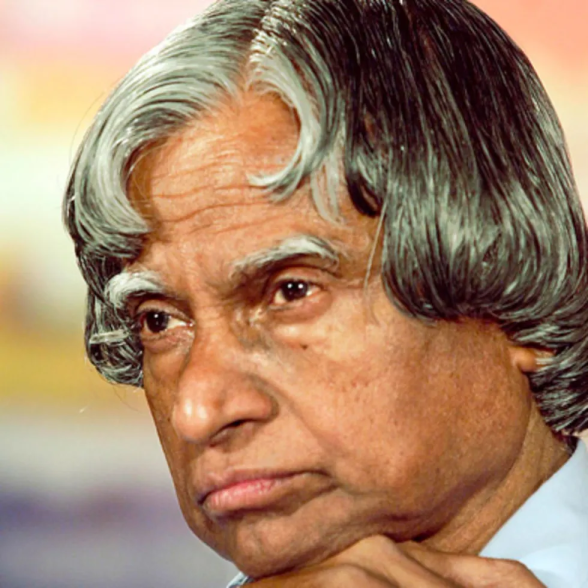

In [5]:
#Resizing image shape
scale_percent = 0.60
width = int(img.shape[1]*scale_percent)
height = int(img.shape[0]*scale_percent)
dim = (width,height)
resized = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
res=px.imshow(resized)
res.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
res.show()


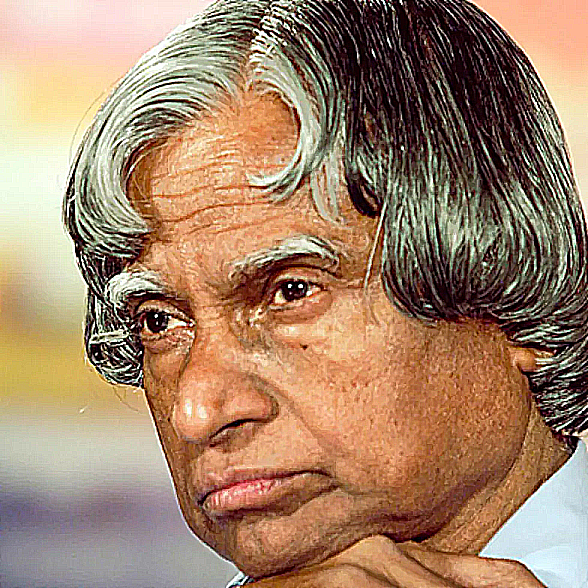

In [6]:
#Sharpening Image
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(resized,-1,kernel_sharpening)
sharp=px.imshow(sharpened)
sharp.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sharp.show()

In [7]:
#Converting an image into gray_scale image
grayscale = cv2.cvtColor(sharpened , cv2.COLOR_BGR2GRAY)
gray = px.imshow(grayscale, color_continuous_scale='gray')
gray.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gray.show()

In [8]:
#Inverting the image
invs = 255-grayscale
inv=px.imshow(invs,color_continuous_scale='gray')
inv.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
inv.show()

In [9]:
#Smoothing the image
gauss = cv2.GaussianBlur(invs,ksize=(15,15),sigmaX=0,sigmaY=0)
gaus=px.imshow(gauss,color_continuous_scale='gray')
gaus.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
gaus.show()

In [10]:
#Obtaining the final sketch
def dodgeV2(image,mask):
    return cv2.divide(image,255-mask,scale=256)

pencil_img = dodgeV2(grayscale,gauss)
sketch=px.imshow(pencil_img,color_continuous_scale='gray')
#sketch.update_layout(width=990, height=600 ,margin=dict(l=20, r=20, b=10, t=10))
sketch.update_layout(coloraxis_showscale=False)
sketch.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)
sketch.show()